In [1]:
from PIL import Image
import numpy as np

In [2]:
group_num = 25
variant_count = 12
variant_num = (group_num - 1) % variant_count + 1
variant_num

1

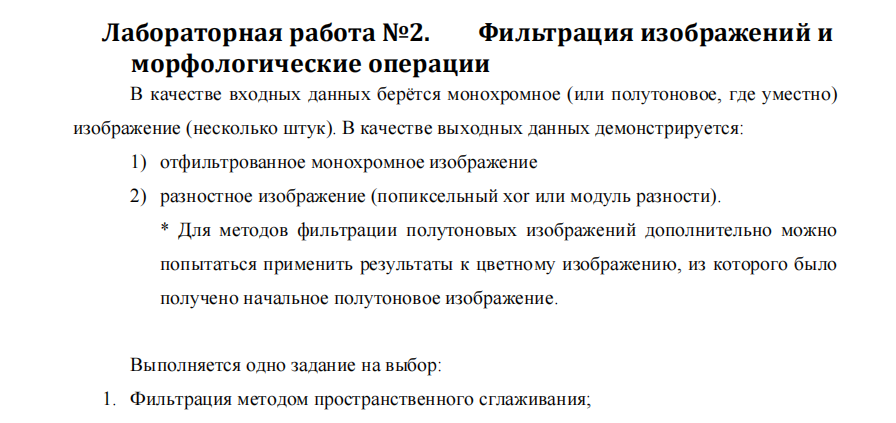

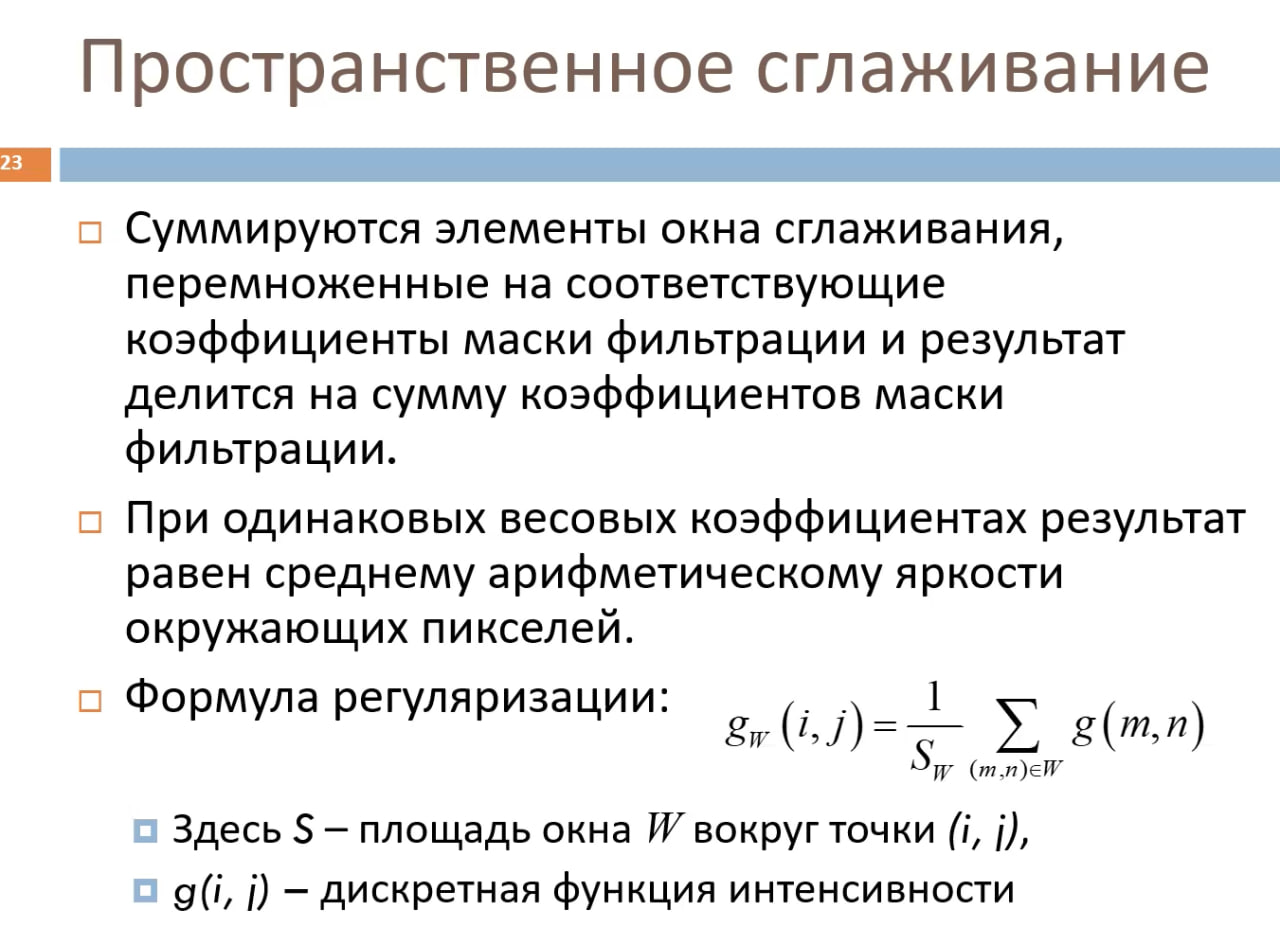

In [4]:
def pixel_photoshop_grayscale(pixel):
    return int(round(pixel[0] * 0.3 + pixel[1] * 0.59 + pixel[2] * 0.11))

In [6]:
def photoshop_grayscale(image):
    result = Image.new('L', (image.width, image.height))

    for x in range(result.width):
        for y in range(result.height):
            pixel = image.getpixel((x, y))
            new_pixel = int(round(pixel[0] * 0.3 + pixel[1] * 0.59 + pixel[2] * 0.11))
            result.putpixel((x, y), new_pixel)

    return result

In [202]:
def filtration(image):
    width, height = image.size
    
    gray_arr = np.asarray(image, dtype=np.uint8)
    
    result = Image.new('L', (image.width, image.height))
    
    window_size = 3
    for i in range(height):
        for j in range(width):
            i_min = max(i - window_size // 2, 0)
            i_max = min(i + window_size // 2, height - 1)
            j_min = max(j - window_size // 2, 0)
            j_max = min(j + window_size // 2, width - 1)
            S = (i_max - i_min + 1) * (j_max - j_min + 1)

            window_sum = np.sum(gray_arr[i_min:i_max+1, j_min:j_max+1])
            new_pixel = int(round(window_sum / S))
            
            result.putpixel((j, i), new_pixel)
            
    return result

In [194]:
shum = Image.open('img_shum.png')
shum_grayscale = photoshop_grayscale(shum)
shum_filtration = filtration(shum_grayscale)

S = 9 i_min = 25 ; i_max = 27, i = 26; j = 60 ; j_min = 59 ; j_max = 61
[[255 255 255]
 [255 255 255]
 [255 255 255]]


In [248]:
butterflies_with_noise = Image.open('butterflies_with_noise.png')
butterflies_grayscale = photoshop_grayscale(butterflies_with_noise)
butterflies_filtration = filtration(butterflies_grayscale)
butterflies_difference_np = np.asarray(butterflies_filtration, dtype = int) - np.asarray(butterflies_grayscale, dtype = int)
butterflies_difference_abs = np.asarray(np.abs(butterflies_difference_np), dtype = np.uint8)
butterflies_difference = Image.fromarray(butterflies_difference_abs)

butterflies_grayscale.save('butterflies_grayscale.png')
butterflies_filtration.save('butterflies_filtration.png')
butterflies_difference.save('butterflies_difference.png')

In [249]:
landscape_with_noise = Image.open('landscape_with_noise.png')
landscape_grayscale = photoshop_grayscale(landscape_with_noise)
landscape_filtration = filtration(landscape_grayscale)
landscape_difference_np = np.asarray(landscape_filtration, dtype = int) - np.asarray(landscape_grayscale, dtype = int)
landscape_difference_abs = np.asarray(np.abs(landscape_difference_np), dtype = np.uint8)
landscape_difference = Image.fromarray(landscape_difference_abs)

landscape_grayscale.save('landscape_grayscale.png')
landscape_filtration.save('landscape_filtration.png')
landscape_difference.save('landscape_difference.png')